In [25]:
#import pustaka (library)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

In [26]:
#membaca file CSV
dataset = pd.read_csv('FuelConsumption.csv')
dataset #berisi DataFrame yang merepresentasikan data dari file CSV

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [27]:
# memberikan informasi tentang DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [29]:
#menghasilkan DataFrame dengan struktur yang berisi boolean (True atau False)
dataset.isnull()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,False,False,False,False,False,False,False,False,False,False,False,False,False
1063,False,False,False,False,False,False,False,False,False,False,False,False,False
1064,False,False,False,False,False,False,False,False,False,False,False,False,False
1065,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
#menghitung jumlah nilai null dalam setiap kolom DataFrame
dataset.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [31]:
#Membuat wanted_data dengan memilih kolom-kolom tertentu
wanted_data = dataset[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]

In [32]:
#berisi kolom-kolom yang dipilih dataset
wanted_data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
...,...,...,...,...
1062,3.0,6,13.4,271
1063,3.2,6,13.2,264
1064,3.0,6,13.4,271
1065,3.2,6,12.9,260


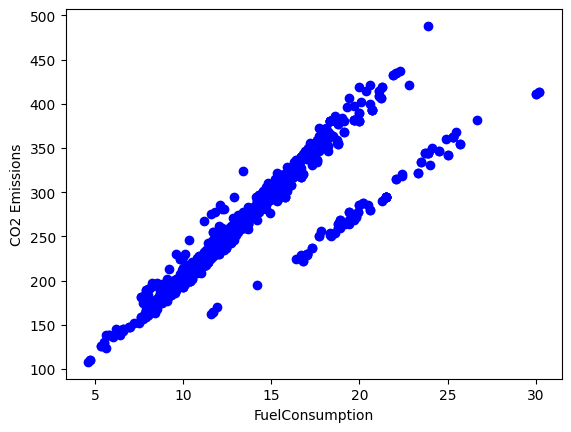

In [34]:
#scatter plot yang menampilkan hubungan antara sumbu x dan sumbu y dari DataFrame wanted_data (variable numerik)
plt.scatter(wanted_data.FUELCONSUMPTION_CITY, wanted_data.CO2EMISSIONS,color="blue")
plt.xlabel("FuelConsumption")
plt.ylabel("CO2 Emissions")
plt.show()

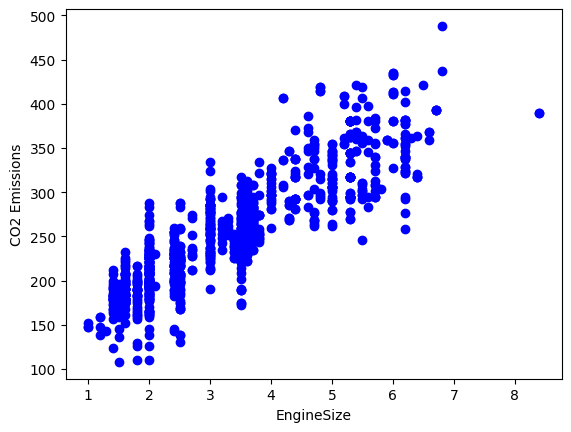

In [35]:
#scatter plot yang menampilkan hubungan antara sumbu x dan sumbu y dari DataFrame wanted_data (variable numerik)
plt.scatter(wanted_data.ENGINESIZE, wanted_data.CO2EMISSIONS,color="blue")
plt.xlabel("EngineSize")
plt.ylabel("CO2 Emissions")
plt.show()

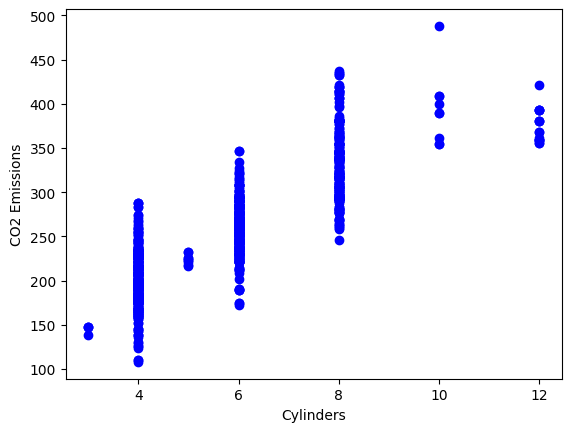

In [36]:
#scatter plot yang menampilkan hubungan antara sumbu x dan sumbu y dari DataFrame wanted_data (variable numerik)
plt.scatter(wanted_data.CYLINDERS, wanted_data.CO2EMISSIONS,color="blue")
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.show()

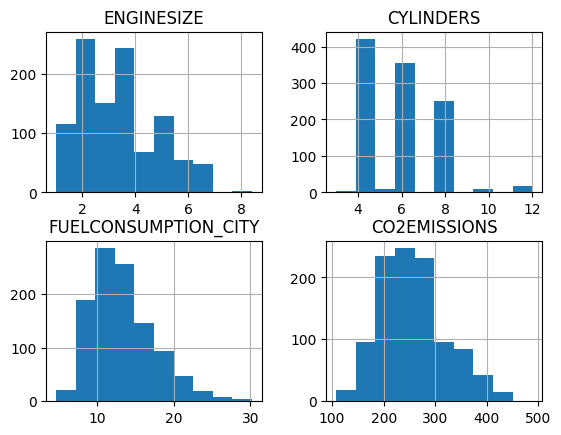

In [37]:
#melihat histogram untuk setiap kolom dalam DataFrame wanted_data
wanted_data.hist()
plt.show()

In [38]:
#membagi DataFrame
msk = np.random.rand(len(wanted_data)) < 0.8
train = wanted_data[msk]
test = wanted_data[~msk]

In [18]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
...,...,...,...,...
1061,3.2,6,13.0,258
1062,3.0,6,13.4,271
1064,3.0,6,13.4,271
1065,3.2,6,12.9,260


In [19]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
6,3.5,6,11.8,232
8,3.7,6,13.4,267
25,2.0,4,12.0,235
31,4.0,8,13.5,260
...,...,...,...,...
1044,1.8,4,10.0,198
1046,2.5,5,11.4,225
1047,3.6,6,12.4,248
1050,3.6,6,14.2,278


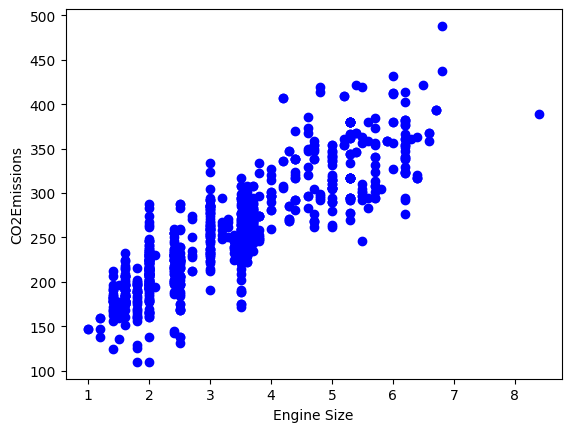

In [39]:
#scatter plot yang menampilkan hubungan antara x dan y dari dataframe 'train'
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2Emissions')
plt.show()

In [41]:
#model regresi linier train_x dan train_y
regression = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(train_x,train_y)
#mencetak
print('Coefficients: ',regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[38.56680033]]
Intercept:  [127.17401792]


Text(0, 0.5, 'Co2Emission')

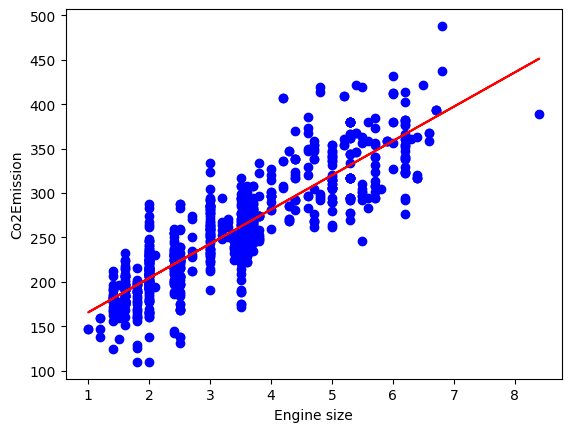

In [42]:
#scatter plot
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regression.coef_[0][0]*train_x + regression.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Co2Emission")